In [1]:
import numpy as np
import pickle
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import csv
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# READ DATASET

In [2]:
dataset = pd.read_csv("cardio_train.csv", sep = ';')


In [3]:
dataset

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [4]:
dataset.shape

(70000, 13)

In [5]:
dataset

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [6]:
dataset["cardio"].unique()

array([0, 1], dtype=int64)

# CHECK DATA BALANCE

In [7]:
dataset.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [8]:
dataset['cardio'].value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cardio', ylabel='count'>

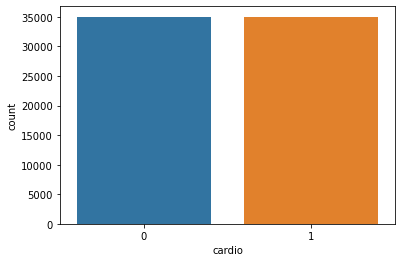

In [9]:
seaborn.countplot(dataset['cardio'])

# DATA VISUALIZATION

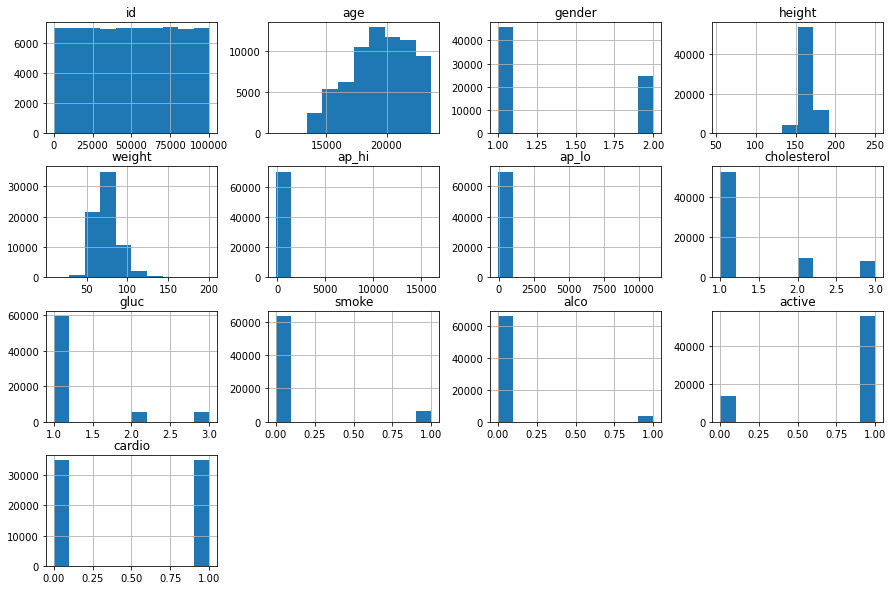

In [10]:
dataset.hist(figsize=(15,10))
plt.show()

<AxesSubplot:xlabel='gender', ylabel='count'>

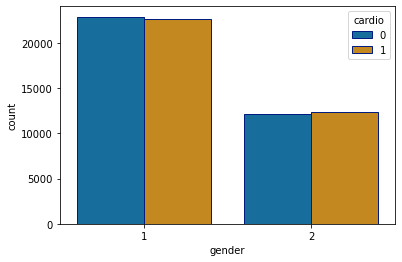

In [11]:
seaborn.countplot(x='gender',hue='cardio',data=dataset,palette='colorblind',edgecolor=seaborn.color_palette('dark',n_colors=1))

<AxesSubplot:xlabel='smoke', ylabel='count'>

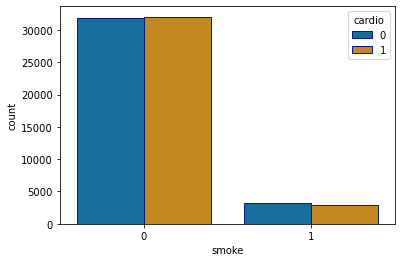

In [12]:
seaborn.countplot(x='smoke',hue='cardio',data=dataset,palette='colorblind',edgecolor=seaborn.color_palette('dark',n_colors=1))

# CORRELATION WITH HEATMAP

<AxesSubplot:>

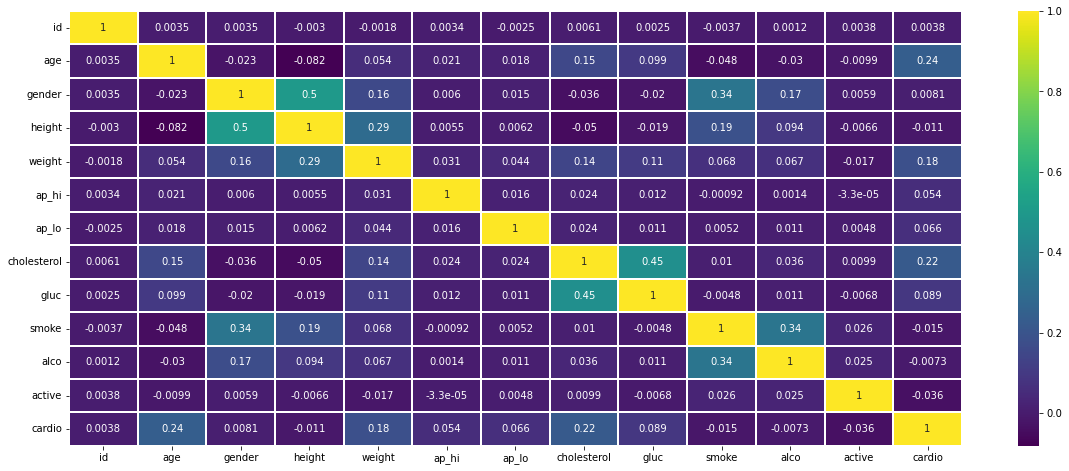

In [13]:
corrmat = dataset.corr()
plt.figure(figsize = (20, 8))
seaborn.heatmap(corrmat, cmap = 'viridis', annot = True, linewidths = '.25')

# SPLITING DATASET

In [14]:
x= dataset.iloc[:,:-1]
y= dataset.iloc[:,11]

# FEATURES SELECTION USING SELETKBOOST

In [15]:
FIT_FEATURES = SelectKBest(score_func=f_classif)

In [16]:
FIT_FEATURES.fit(x,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


SelectKBest()

In [17]:
NAME_COL =pd.DataFrame(x.columns)

In [18]:
 SCORE_COL = pd.DataFrame(FIT_FEATURES.scores_,columns =['score value'])

In [19]:
SCORE_COL

,score value
0,0.987048
1,6.899148
2,2.408439
3,3.021171
4,19.919197
5,0.000076
6,1.599552
7,6.876846
8,3.207902
9,46.834396


In [20]:
NAME_COL = pd.DataFrame(x.columns)

In [21]:
top_features = pd.concat([NAME_COL,SCORE_COL],axis=1)

In [22]:
top_features

,0,score value
0,id,0.987048
1,age,6.899148
2,gender,2.408439
3,height,3.021171
4,weight,19.919197
5,ap_hi,0.000076
6,ap_lo,1.599552
7,cholesterol,6.876846
8,gluc,3.207902
9,smoke,46.834396


In [23]:
top_features.nlargest(6,'score value')

,0,score value
11,active,inf
9,smoke,46.834396
10,alco,45.459457
4,weight,19.919197
1,age,6.899148
7,cholesterol,6.876846


# DROP LOW SCORE FEATURE

In [24]:
dataset


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [25]:
dataset.drop(['id','gender','height','ap_hi','ap_lo','gluc'] , axis = 1, inplace = True)

In [26]:
dataset

,age,weight,cholesterol,smoke,alco,active,cardio
0,18393,62.0,1,0,0,1,0
1,20228,85.0,3,0,0,1,1
2,18857,64.0,3,0,0,0,1
3,17623,82.0,1,0,0,1,1
4,17474,56.0,1,0,0,0,0
...,...,...,...,...,...,...,...
69995,19240,76.0,1,1,0,1,0
69996,22601,126.0,2,0,0,1,1
69997,19066,105.0,3,0,1,0,1
69998,22431,72.0,1,0,0,0,1


# Detect Outlier

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


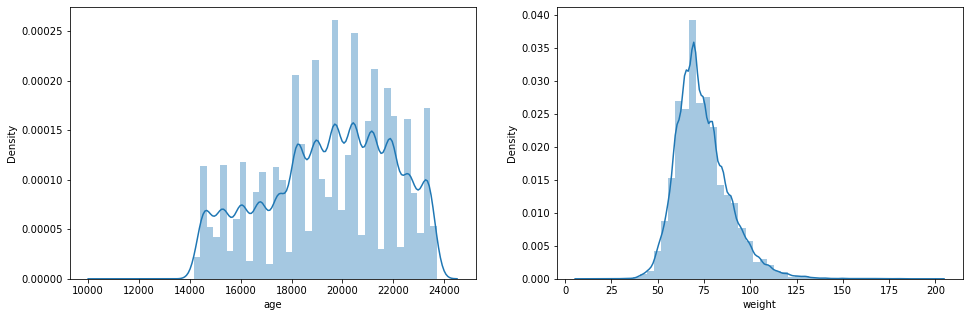

In [27]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
seaborn.distplot(dataset['age'])

plt.subplot(1,2,2)
seaborn.distplot(dataset['weight'])

plt.show()

In [28]:
dataset['weight'].skew()

1.0120701082089065

In [29]:
dataset['weight'].describe()

count    70000.000000
mean        74.205690
std         14.395757
min         10.000000
25%         65.000000
50%         72.000000
75%         82.000000
max        200.000000
Name: weight, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='weight'>

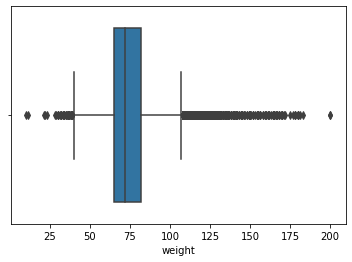

In [30]:
seaborn.boxplot(dataset['weight'])

In [31]:
#finding the IQR
percentile25 = dataset['weight'].quantile(0.25)
percentile75 = dataset['weight'].quantile(0.75)

In [32]:
percentile25

65.0

In [33]:
percentile75

82.0

In [34]:
iqr = percentile75 - percentile25

In [35]:
iqr

17.0

In [36]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile75 - 1.5 * iqr

In [37]:
print("upper_limit",upper_limit)
print("lower_limit",lower_limit)

upper_limit 107.5
lower_limit 56.5


In [38]:
dataset[dataset['weight'] > upper_limit]

,age,weight,cholesterol,smoke,alco,active,cardio
15,16782,112.0,1,0,0,0,1
62,20330,115.0,1,0,1,1,0
83,19570,110.0,1,0,0,1,1
196,22675,108.0,1,0,0,0,0
267,17460,115.0,1,0,0,1,1
...,...,...,...,...,...,...,...
69873,19736,108.0,2,0,1,0,1
69946,21333,115.0,1,0,0,1,1
69947,23305,113.0,1,0,0,0,1
69981,17500,110.0,2,0,0,1,1


In [39]:
dataset[dataset['weight'] < lower_limit]

,age,weight,cholesterol,smoke,alco,active,cardio
4,17474,56.0,1,0,0,0,0
17,16747,52.0,1,0,0,1,0
19,21755,56.0,1,1,0,1,0
23,23376,45.0,1,0,0,1,0
35,20404,55.0,1,0,0,1,0
...,...,...,...,...,...,...,...
69943,22570,55.0,2,0,0,1,1
69951,15254,55.0,1,0,0,1,0
69961,16598,50.0,1,0,0,1,0
69987,18852,49.0,1,0,0,1,0


In [40]:
new_dataset = dataset .copy()
new_dataset['weight'] = np.where(
    new_dataset['weight'] > upper_limit,
    upper_limit,
    np.where(
        new_dataset['weight'] < lower_limit,
        lower_limit,
        new_dataset['weight']
    
    )


)

In [41]:
new_dataset.shape

(70000, 7)

# For skew data in Age


In [42]:
dataset['age'].skew()

-0.3070553957245462

In [43]:
dataset['age'].describe()

count    70000.000000
mean     19468.865814
std       2467.251667
min      10798.000000
25%      17664.000000
50%      19703.000000
75%      21327.000000
max      23713.000000
Name: age, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

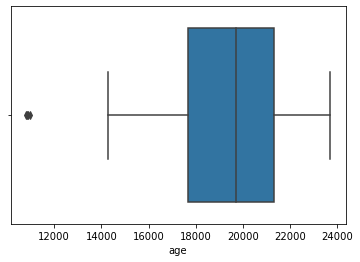

In [44]:
seaborn.boxplot(dataset['age'])

In [45]:
#finding the IQR
percentile25 = dataset['age'].quantile(0.25)
percentile75 = dataset['age'].quantile(0.75)

In [46]:
percentile25


17664.0

In [47]:
percentile75

21327.0

In [48]:
iqr = percentile75 - percentile25

In [49]:
iqr

3663.0

In [50]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile75 - 1.5 * iqr

In [51]:
print("upper_limit",upper_limit)
print("lower_limit",lower_limit)

upper_limit 26821.5
lower_limit 15832.5


In [52]:
dataset[dataset['age'] > upper_limit]

,age,weight,cholesterol,smoke,alco,active,cardio


In [53]:
dataset[dataset['age'] < lower_limit]

,age,weight,cholesterol,smoke,alco,active,cardio
12,14791,60.0,1,0,0,0,0
14,14532,95.0,1,1,1,1,0
25,14453,65.0,2,0,0,1,0
28,14574,66.0,1,0,0,1,0
32,14605,60.0,1,0,0,1,0
...,...,...,...,...,...,...,...
69954,15151,60.0,2,0,0,1,0
69957,15536,90.0,1,1,0,1,0
69958,15239,67.0,1,0,0,1,1
69965,15450,66.0,1,0,0,0,0


In [54]:
new_dataset = dataset .copy()
new_dataset['age'] = np.where(
    new_dataset['age'] > upper_limit,
    upper_limit,
    np.where(
        new_dataset['age'] < lower_limit,
        lower_limit,
        new_dataset['age']
    
    )


)

In [55]:
new_dataset.shape

(70000, 7)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  w

<AxesSubplot:xlabel='age'>

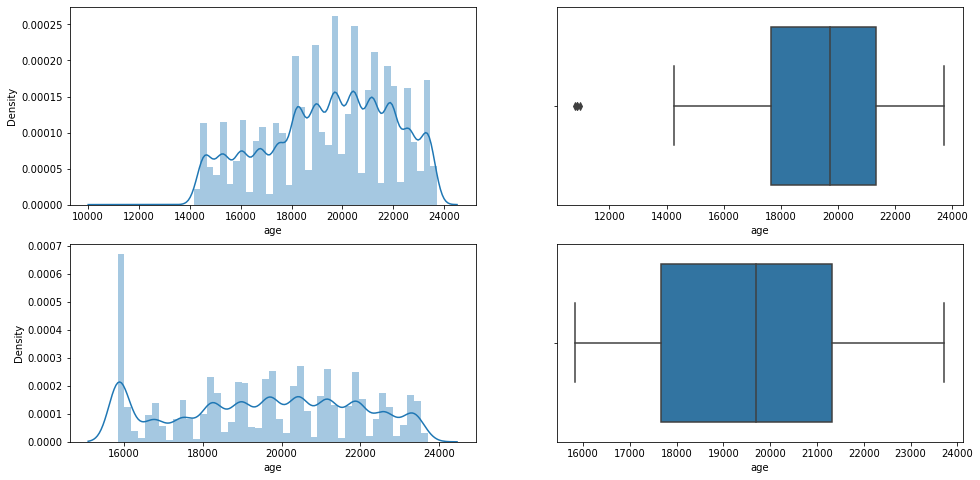

In [56]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
seaborn.distplot(dataset['age'])

plt.subplot(2,2,2)
seaborn.boxplot(dataset['age'])


plt.subplot(2,2,3)
seaborn.distplot(new_dataset['age'])

plt.subplot(2,2,4)
seaborn.boxplot(new_dataset['age'])

# Level Encoding

In [57]:
from sklearn.preprocessing import LabelEncoder

In [58]:
label_encoder = LabelEncoder()

In [59]:
print(label_encoder)

LabelEncoder()


In [60]:
dataset["cardio"] = label_encoder.fit_transform(dataset["cardio"])

In [61]:
new_dataset

,age,weight,cholesterol,smoke,alco,active,cardio
0,18393.0,62.0,1,0,0,1,0
1,20228.0,85.0,3,0,0,1,1
2,18857.0,64.0,3,0,0,0,1
3,17623.0,82.0,1,0,0,1,1
4,17474.0,56.0,1,0,0,0,0
...,...,...,...,...,...,...,...
69995,19240.0,76.0,1,1,0,1,0
69996,22601.0,126.0,2,0,0,1,1
69997,19066.0,105.0,3,0,1,0,1
69998,22431.0,72.0,1,0,0,0,1


# DATA SPLITTING AFTER FEATURE SELECTION

In [62]:
x= new_dataset.iloc[:,:-1].values
y= new_dataset.iloc[:,-1].values

In [63]:
x

array([[1.8393e+04, 6.2000e+01, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       [2.0228e+04, 8.5000e+01, 3.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       [1.8857e+04, 6.4000e+01, 3.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       ...,
       [1.9066e+04, 1.0500e+02, 3.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00],
       [2.2431e+04, 7.2000e+01, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [2.0540e+04, 7.2000e+01, 2.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00]])

In [64]:
y

array([0, 1, 1, ..., 1, 1, 0], dtype=int64)

In [65]:
new_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  float64
 1   weight       70000 non-null  float64
 2   cholesterol  70000 non-null  int64  
 3   smoke        70000 non-null  int64  
 4   alco         70000 non-null  int64  
 5   active       70000 non-null  int64  
 6   cardio       70000 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 3.7 MB


In [66]:
x.shape

(70000, 6)

# SPLITING DATASET FRO TRAIN TEST

In [67]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [68]:
print(x_train)

[[2.3423e+04 7.6000e+01 3.0000e+00 0.0000e+00 0.0000e+00 1.0000e+00]
 [1.9514e+04 5.5000e+01 1.0000e+00 0.0000e+00 0.0000e+00 1.0000e+00]
 [2.0875e+04 9.5000e+01 1.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00]
 ...
 [2.2385e+04 7.2000e+01 1.0000e+00 0.0000e+00 0.0000e+00 1.0000e+00]
 [1.8321e+04 8.5000e+01 1.0000e+00 0.0000e+00 0.0000e+00 1.0000e+00]
 [2.0424e+04 7.3000e+01 1.0000e+00 0.0000e+00 0.0000e+00 1.0000e+00]]


# LOGISTIC REGRESSION WITHOUT PCA

In [69]:
from sklearn.linear_model import LogisticRegression
model_logistic = LogisticRegression()
model_logistic.fit(x_train,y_train)

LogisticRegression()

In [70]:
y_pred_logistic = model_logistic.predict(x_test)

In [71]:
from sklearn.metrics import accuracy_score
logistic_Acc = accuracy_score(y_test,y_pred_logistic)

In [72]:
print(logistic_Acc)

0.5762142857142857


In [73]:
from sklearn.metrics import classification_report
print( classification_report(y_test,y_pred_logistic))

              precision    recall  f1-score   support

           0       0.56      0.74      0.64      7069
           1       0.61      0.41      0.49      6931

    accuracy                           0.58     14000
   macro avg       0.58      0.57      0.56     14000
weighted avg       0.58      0.58      0.56     14000



# APPLY PCA

In [74]:
from sklearn.preprocessing import StandardScaler

In [75]:
scaling = StandardScaler()

In [76]:
scale=scaling.fit_transform(new_dataset)  

In [77]:
scale_data= pd.DataFrame(scale,columns=new_dataset.columns)
scale_data

,age,weight,cholesterol,smoke,alco,active,cardio
0,-0.501654,-0.847873,-0.539322,-0.310879,-0.238384,0.494167,-0.9994
1,0.290692,0.749831,2.400793,-0.310879,-0.238384,0.494167,1.0006
2,-0.301301,-0.708942,2.400793,-0.310879,-0.238384,-2.023607,1.0006
3,-0.834137,0.541435,-0.539322,-0.310879,-0.238384,0.494167,1.0006
4,-0.898475,-1.264666,-0.539322,-0.310879,-0.238384,-2.023607,-0.9994
...,...,...,...,...,...,...,...
69995,-0.135923,0.124642,-0.539322,3.216684,-0.238384,0.494167,-0.9994
69996,1.315344,3.597913,0.930735,-0.310879,-0.238384,0.494167,1.0006
69997,-0.211055,2.139139,2.400793,-0.310879,4.194906,-2.023607,1.0006
69998,1.241939,-0.153219,-0.539322,-0.310879,-0.238384,-2.023607,1.0006


In [78]:
from sklearn.decomposition import PCA

In [79]:
pca = PCA(n_components = 2)

In [80]:
pca.fit(scale_data)

PCA(n_components=2)

In [81]:
x_pca=pca.transform(scale_data)

In [82]:
scale_data.shape

(70000, 7)

In [83]:
x_pca.shape

(70000, 2)

In [84]:
x_pca

array([[-1.50906678, -0.21064637],
       [ 2.19163316, -0.42886509],
       [ 1.42570887, -0.78026555],
       ...,
       [ 3.10868241,  2.59167035],
       [ 0.84967889, -0.97233179],
       [-0.0421732 , -0.32467342]])

Text(0, 0.5, 'Second principle component')

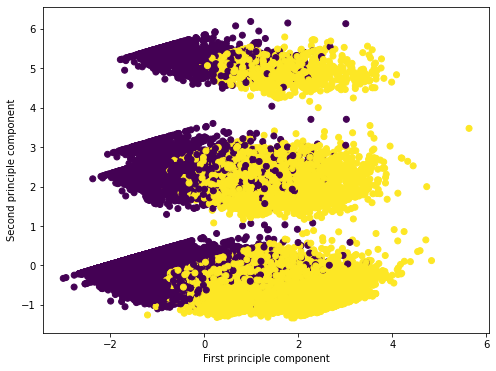

In [85]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,-1],c=dataset['cardio'])
plt.xlabel('First principle component')
plt.ylabel('Second principle component')


# Data splitting after PCA

In [86]:
x_train_pca,x_test,y_train_pca,y_test = train_test_split(x_pca,y,test_size=0.2,random_state=0)

# LOGISTIC REGRESSION MODEL AFTER PCA

In [87]:
logistic = LogisticRegression()

In [88]:
logistic.fit(x_train_pca, y_train)

LogisticRegression()

In [89]:
logistic_trainacc=logistic.score(x_train_pca,y_train)
logistic_trainacc

0.8669285714285714

In [90]:
logistic_testacc=logistic.score(x_test,y_test)
logistic_testacc

0.862

In [91]:
from sklearn.model_selection import cross_val_score

In [92]:
logistic_crossval = cross_val_score(logistic,x_train_pca,y_train).mean()
logistic_crossval

0.867

# ROC CURVE OF LOGISTIC MODEL

In [219]:
from sklearn.metrics import recall_score, precision_score,f1_score
from sklearn.model_selection import cross_val_predict

In [220]:
y_pred_logistic= logistic.decision_function(x_test)

In [221]:
y_train_pred_logistic = cross_val_predict(logistic, x_train_pca, y_train, cv = 3)
print('precision_score',precision_score(y_train, y_train_pred_logistic))
print('recall_score',recall_score(y_train, y_train_pred_logistic))
print('f1_score',f1_score(y_train, y_train_pred_logistic))

precision_score 0.8682761087267525
recall_score 0.8655519110096976
f1_score 0.8669118697328954


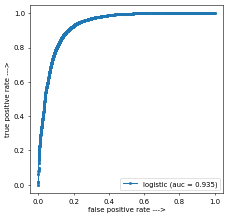

In [94]:
from sklearn.metrics import roc_curve,auc
logistic_fpr,logistic_tpr ,threshold = roc_curve(y_test,y_pred_logistic)
auc_logistic = auc(logistic_fpr,logistic_tpr)


plt.figure(figsize=(5,5),dpi= 50)
plt.plot(logistic_fpr,logistic_tpr,marker='.',label='logistic (auc = %0.3f)' % auc_logistic)

plt.xlabel('false positive rate --->')
plt.ylabel('true positive rate --->')

plt.legend()
plt.show()

In [95]:
x_test

array([[-2.04002109,  0.00851371],
       [-1.46344531, -0.41930324],
       [-0.87984245, -0.33385747],
       ...,
       [ 1.49791502, -1.04091298],
       [-1.26658314,  2.58414271],
       [-0.30045439, -0.52003988]])

# visualization of the confution matrix#

In [96]:
y_pred_logistic = logistic.predict(x_test).round()

In [125]:
import numpy
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics


In [126]:
cm=confusion_matrix(y_pred_logistic,y_test)
cm

array([[6121,  984],
       [ 948, 5947]], dtype=int64)

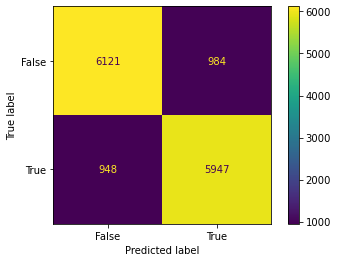

In [127]:
cm_display= metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[False,True])
cm_display.plot()
plt.show()

Text(33.0, 0.5, 'Actual Label')

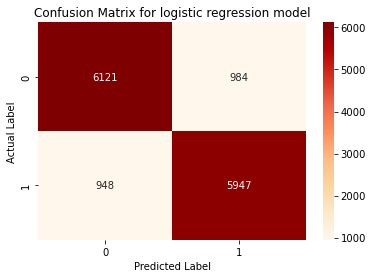

In [106]:
p = seaborn.heatmap(pd.DataFrame(cm),annot = True,cmap= 'OrRd',fmt='g')
plt.title('Confusion Matrix for logistic regression model')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

In [107]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [108]:
y_pred = logistic.predict(x_test)

In [109]:
MAE = mean_absolute_error(y_test,y_pred)
print("MAE",MAE)

MAE 0.138


In [110]:
MSE = mean_squared_error(y_test,y_pred)
print("MSE",MSE)

MSE 0.138


In [111]:
RMSE = np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE",RMSE)

RMSE 0.3714835124201342


In [112]:
R2 = r2_score(y_test,y_pred)
print("R2", R2)

R2 0.4479463606657782


<BarContainer object of 1 artists>

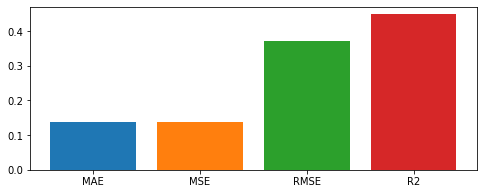

In [113]:
plt.figure(figsize=(8,3))
plt.bar("MAE",MAE)
plt.bar("MSE",MSE)
plt.bar("RMSE",RMSE)
plt.bar("R2",R2)


# Precision,recall and F1 score of logistic regression

In [114]:
from sklearn.metrics import classification_report
print( classification_report(y_test,y_pred_logistic))

              precision    recall  f1-score   support

           0       0.86      0.87      0.86      7069
           1       0.86      0.86      0.86      6931

    accuracy                           0.86     14000
   macro avg       0.86      0.86      0.86     14000
weighted avg       0.86      0.86      0.86     14000



# SVM

In [115]:
from sklearn.svm import SVC
model_svm = SVC()
model_svm.fit(x_train_pca,y_train)

SVC()

In [116]:
svm_acc=model_svm.score(x_train_pca,y_train)
svm_acc

0.870625

In [117]:
model_svm.score(x_test,y_test)

0.8670714285714286

In [118]:
cross_val_score(model_svm,x_train_pca,y_train).mean()

0.8704821428571428

In [222]:
y_train_pred_svm = cross_val_predict(model_svm, x_train_pca, y_train, cv = 3)
print('precision_score',precision_score(y_train, y_train_pred_svm))
print('recall_score',recall_score(y_train, y_train_pred_svm))
print('f1_score',f1_score(y_train, y_train_pred_svm))

precision_score 0.850767414403778
recall_score 0.8992084997147747
f1_score 0.8743175081899017


# ROC CURVE OF SVM MODEL

In [128]:
y_pred_model_svm= model_svm.decision_function(x_test)

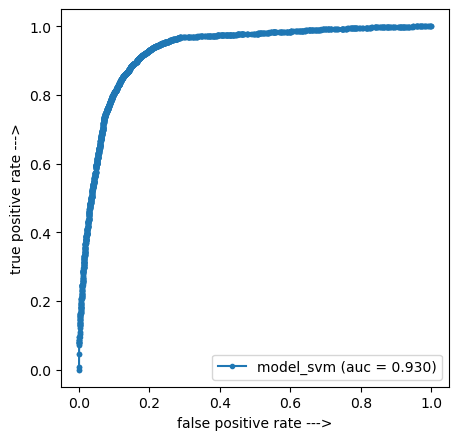

In [129]:
from sklearn.metrics import roc_curve,auc
model_svm_fpr,model_svm_tpr ,threshold = roc_curve(y_test,y_pred_model_svm)
auc_model_svm = auc(model_svm_fpr,model_svm_tpr)


plt.figure(figsize=(5,5),dpi=100)
plt.plot(model_svm_fpr,model_svm_tpr,marker='.',label='model_svm (auc = %0.3f)' % auc_model_svm)

plt.xlabel('false positive rate --->')
plt.ylabel('true positive rate --->')

plt.legend()
plt.show()

# Confusion matrics of SVM

In [130]:
y_pred_model_svm = model_svm.predict(x_test).round()

In [131]:
cm1=confusion_matrix(y_test,y_pred_model_svm)
cm1

array([[5953, 1116],
       [ 745, 6186]], dtype=int64)

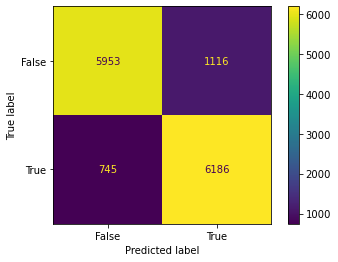

In [132]:
cm1_display= metrics.ConfusionMatrixDisplay(confusion_matrix=cm1,display_labels=[False,True])
cm1_display.plot()
plt.show()

In [138]:
y_pred = model_svm.predict(x_test)

In [139]:
MAE = mean_absolute_error(y_test,y_pred)
print("MAE",MAE)

MAE 0.13292857142857142


In [140]:
MSE = mean_squared_error(y_test,y_pred)
print("MSE",MSE)

MSE 0.13292857142857142


In [141]:
RMSE = np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE",RMSE)

RMSE 0.36459370733540014


In [142]:
R2 = r2_score(y_test,y_pred)
print("R2", R2)

R2 0.46823404616926145


<BarContainer object of 1 artists>

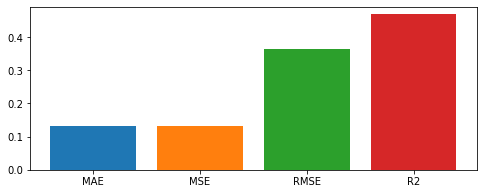

In [143]:
plt.figure(figsize=(8,3))
plt.bar("MAE",MAE)
plt.bar("MSE",MSE)
plt.bar("RMSE",RMSE)
plt.bar("R2",R2)


# Precision,recall and F1 score of SVM¶


In [144]:
from sklearn.metrics import classification_report
print( classification_report(y_test,y_pred_model_svm))

              precision    recall  f1-score   support

           0       0.89      0.84      0.86      7069
           1       0.85      0.89      0.87      6931

    accuracy                           0.87     14000
   macro avg       0.87      0.87      0.87     14000
weighted avg       0.87      0.87      0.87     14000



# KNN

In [145]:
from sklearn.neighbors import KNeighborsClassifier
model_kneighbors = KNeighborsClassifier()
model_kneighbors.fit(x_train_pca,y_train)

KNeighborsClassifier()

In [146]:
kneighbors_acc=model_kneighbors.score(x_train_pca,y_train)
kneighbors_acc

0.9255535714285714

In [147]:
model_kneighbors.score(x_test,y_test)

0.8977142857142857

In [148]:
cross_val_score(model_kneighbors,x_train_pca,y_train).mean()

0.8919642857142855

In [223]:
y_train_pred_knn = cross_val_predict(model_kneighbors, x_train_pca, y_train, cv = 3)
print('precision_score',precision_score(y_train, y_train_pred_knn))
print('recall_score',recall_score(y_train, y_train_pred_knn))
print('f1_score',f1_score(y_train, y_train_pred_knn))

precision_score 0.8662602721271723
recall_score 0.9170350827153452
f1_score 0.8909248354693454


# ROC CURVE of KNN

In [149]:
y_pred_model_kneighbors= model_kneighbors.predict(x_test)

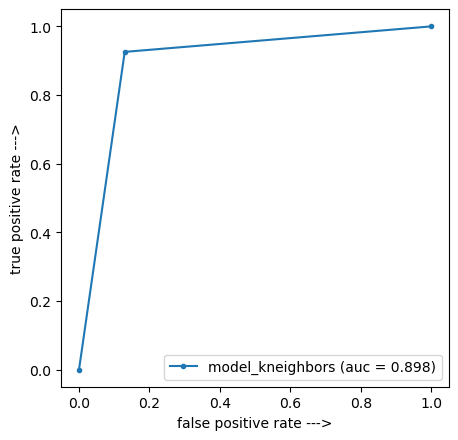

In [150]:
from sklearn.metrics import roc_curve,auc
model_kneighbors_fpr,model_kneighbors_tpr ,threshold = roc_curve(y_test,y_pred_model_kneighbors)
auc_model_kneighbors = auc(model_kneighbors_fpr,model_kneighbors_tpr)


plt.figure(figsize=(5,5),dpi=100)
plt.plot(model_kneighbors_fpr,model_kneighbors_tpr,marker='.',label='model_kneighbors (auc = %0.3f)' % auc_model_kneighbors)
plt.xlabel('false positive rate --->')
plt.ylabel('true positive rate --->')

plt.legend()
plt.show()

# Confusion matrics of knn

In [151]:
y_pred_model_kneighbors = model_kneighbors.predict(x_test).round()

In [155]:
cm4=confusion_matrix(y_test,y_pred_model_kneighbors)
cm4

array([[6152,  917],
       [ 515, 6416]], dtype=int64)

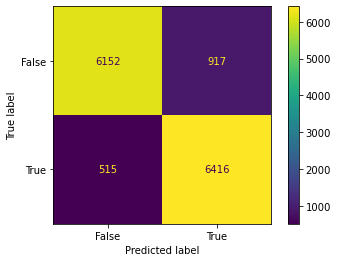

In [156]:
cm4_display= metrics.ConfusionMatrixDisplay(confusion_matrix=cm4,display_labels=[False,True])
cm4_display.plot()
plt.show()

Text(33.0, 0.5, 'Actual Label')

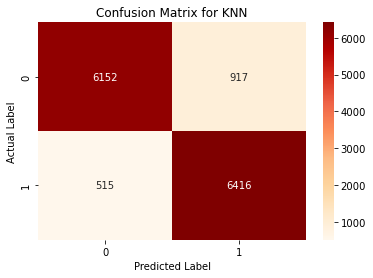

In [157]:
p = seaborn.heatmap(pd.DataFrame(cm4),annot = True,cmap= 'OrRd',fmt='g')
plt.title('Confusion Matrix for KNN')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

# Precision,recall and F1 score of KNN¶


In [158]:
from sklearn.metrics import classification_report
print( classification_report(y_test,y_pred_model_kneighbors))


              precision    recall  f1-score   support

           0       0.92      0.87      0.90      7069
           1       0.87      0.93      0.90      6931

    accuracy                           0.90     14000
   macro avg       0.90      0.90      0.90     14000
weighted avg       0.90      0.90      0.90     14000



In [159]:
y_pred = model_kneighbors.predict(x_test)

In [160]:
MAE = mean_absolute_error(y_test,y_pred)
print("MAE",MAE)

MAE 0.10228571428571429


In [161]:
MSE = mean_squared_error(y_test,y_pred)
print("MSE",MSE)

MSE 0.10228571428571429


In [162]:
RMSE = np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE",RMSE)

RMSE 0.3198213787189879


In [163]:
R2 = r2_score(y_test,y_pred)
print("R2", R2)

R2 0.5908173853381958


<BarContainer object of 1 artists>

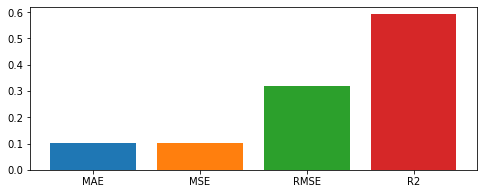

In [164]:
plt.figure(figsize=(8,3))
plt.bar("MAE",MAE)
plt.bar("MSE",MSE)
plt.bar("RMSE",RMSE)
plt.bar("R2",R2)


# Decision tree Algorithm


In [165]:
from sklearn.tree import DecisionTreeClassifier
model_tree = DecisionTreeClassifier()
model_tree.fit(x_train_pca,y_train)


DecisionTreeClassifier()

In [166]:
dtree_trainacc=model_tree.score(x_train_pca,y_train)
dtree_trainacc

1.0

In [168]:
dtree_testacc=model_tree.score(x_test,y_test)
dtree_testacc

0.8807142857142857

In [169]:
cross_val_score(model_tree,x_train_pca,y_train).mean()


0.8692499999999999

In [228]:
y_train_pred_tree= cross_val_predict(model_tree, x_train_pca, y_train, cv = 3)
print('precision_score',precision_score(y_train, y_train_pred_tree))
print('recall_score',recall_score(y_train, y_train_pred_tree))
print('f1_score',f1_score(y_train, y_train_pred_tree))

precision_score 0.8627555555555556
recall_score 0.865124073017684
f1_score 0.8639381909458281


# Random forest Algorithm

In [170]:
from sklearn.ensemble import RandomForestClassifier
model_random = RandomForestClassifier(n_estimators=1000)
model_random.fit(x_train_pca,y_train)

RandomForestClassifier(n_estimators=1000)

In [172]:
random_trainacc=model_random.score(x_train_pca,y_train)
random_trainacc

1.0

In [173]:
random_testacc = model_random.score(x_test,y_test)
random_testacc

0.9052857142857142

In [174]:
cross_val_score(model_random,x_train_pca,y_train).mean()

0.8972678571428571

In [227]:
y_train_pred_random= cross_val_predict(model_random, x_train_pca, y_train, cv = 3)
print('precision_score',precision_score(y_train, y_train_pred_random))
print('recall_score',recall_score(y_train, y_train_pred_random))
print('f1_score',f1_score(y_train, y_train_pred_random))

precision_score 0.875
recall_score 0.9211708499714775
f1_score 0.8974920105599555


# Naive base

In [176]:
from sklearn.naive_bayes import BernoulliNB
model_nv =  BernoulliNB()
model_nv.fit(x_train_pca, y_train)

BernoulliNB()

In [177]:
nv_trainacc=model_nv.score(x_train_pca,y_train)
nv_trainacc

0.8544464285714286

In [178]:
nv_testacc = model_random.score(x_test,y_test)
nv_testacc

0.9052857142857142

In [179]:
cross_val_score(model_random,x_train_pca,y_train).mean()

0.8976964285714285

In [226]:
y_train_pred_nv= cross_val_predict(model_nv, x_train_pca, y_train, cv = 3)
print('precision_score',precision_score(y_train, y_train_pred_nv))
print('recall_score',recall_score(y_train, y_train_pred_nv))
print('f1_score',f1_score(y_train, y_train_pred_nv))

precision_score 0.8681221091581869
recall_score 0.8364589275527667
f1_score 0.8519964410872842


# ENSEMBLE MODEL IN 3 ALGORITHM

In [199]:
m1=LogisticRegression()
m2= SVC()
m3=KNeighborsClassifier()

In [200]:
from sklearn.ensemble import VotingClassifier


In [201]:
model =  VotingClassifier([('lr',m1),('svm',m2),('knn',m3)])

In [202]:
model.fit(x_train_pca,y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()), ('svm', SVC()),
                             ('knn', KNeighborsClassifier())])

In [203]:
model_acc=model.score(x_train_pca,y_train)
model_acc

0.8786428571428572

In [204]:
model.score(x_test,y_test)

0.8718571428571429

In [205]:
cross_val_score(model,x_train_pca,y_train,cv=10).mean()

0.8742857142857143

In [225]:
y_train_pred_model= cross_val_predict(model, x_train_pca, y_train, cv = 3)
print('precision_score',precision_score(y_train, y_train_pred_model))
print('recall_score',recall_score(y_train, y_train_pred_model))
print('f1_score',f1_score(y_train, y_train_pred_model))

precision_score 0.8619523973784063
recall_score 0.8909013120365088
f1_score 0.8761878046214804


# ROC Curve of Ensemble MODEL

In [ ]:
y_pred_model= model.predict(x_test)

In [ ]:
from sklearn.metrics import roc_curve,auc
model_fpr,model_tpr ,threshold = roc_curve(y_test,y_pred_model)
auc_model = auc(model_fpr,model_tpr)


plt.figure(figsize=(5,5),dpi=100)
plt.plot(model_fpr,model_tpr,marker='.',label='model (auc = %0.3f)' % auc_model)

plt.xlabel('false positive rate --->')
plt.ylabel('true positive rate --->')

plt.legend()
plt.show()

# Confusion matrics of Ensemble Model

In [ ]:
y_pred_model = model.predict(x_test).round()

In [ ]:
confusion_matrix(y_test,y_pred_model)

In [ ]:
cm4=confusion_matrix(y_test,y_pred_model).ravel()

In [ ]:
p = seaborn.heatmap(pd.DataFrame(cm2),annot = True,cmap= 'OrRd',fmt='g')
plt.title('Confusion Matrix for SVM')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

# Error in Ensemble Model

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_test

In [ ]:
MAE = mean_absolute_error(y_test,y_pred)

In [ ]:
print("MAE",MAE)

In [ ]:
MSE = mean_squared_error(y_test,y_pred)

In [ ]:
print("MSE",MSE)

In [ ]:
RMSE = np.sqrt(mean_squared_error(y_test,y_pred))

In [ ]:
print("RMSE",RMSE)

In [ ]:
R2 = r2_score(y_test,y_pred)

In [ ]:
print("R2", R2)

In [ ]:
plt.figure(figsize=(8,3))
plt.bar("MAE",MAE)
plt.bar("MSE",MSE)
plt.bar("RMSE",RMSE)
plt.bar("R2",R2)


# Precision,recall and F1 score of Ensemble Model

In [ ]:
from sklearn.metrics import classification_report
print( classification_report(y_test,y_pred_model))

# Comparing ROC CURVE in LR,SVM,KNN,Ensemble

In [ ]:
from sklearn.metrics import roc_curve,auc

logistic_fpr,logistic_tpr ,threshold = roc_curve(y_test,y_pred_logistic)
auc_logistic = auc(logistic_fpr,logistic_tpr)

model_svm_fpr,model_svm_tpr ,threshold = roc_curve(y_test,y_pred_model_svm)
auc_model_svm = auc(model_svm_fpr,model_svm_tpr)

model_kneighbors_fpr,model_kneighbors_tpr ,threshold = roc_curve(y_test,y_pred_model_kneighbors)
auc_model_kneighbors = auc(model_kneighbors_fpr,model_kneighbors_tpr)

model_fpr,model_tpr ,threshold = roc_curve(y_test,y_pred_model)
auc_model = auc(model_fpr,model_tpr)





plt.figure(figsize=(4.5,4.5),dpi=100)
plt.plot(logistic_fpr,logistic_tpr,marker='.',label='logistic (auc = %0.3f)' % auc_logistic)
plt.plot(model_svm_fpr,model_svm_tpr,marker='.',label='model_svm (auc = %0.3f)' % auc_model_svm)
plt.plot(model_kneighbors_fpr,model_kneighbors_tpr,marker='.',label='model_kneighbors (auc = %0.3f)' % auc_model_kneighbors)
plt.plot(model_fpr,model_tpr,marker='.',label='model (auc = %0.3f)' % auc_model)



plt.xlabel('false positive rate --->')
plt.ylabel('true positive rate --->')

plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(8,4))
plt.bar("logistic Regression",logistic_acc)
plt.bar("Support Vector Mechine",svm_acc)
plt.bar("KNeighbors",kneighbors_acc)
plt.bar("Ensemble",model_acc)


In [229]:
m1=KNeighborsClassifier()
m2=DecisionTreeClassifier()
m3=RandomForestClassifier(n_estimators=1000)

In [230]:
from sklearn.ensemble import VotingClassifier


In [231]:
model =  VotingClassifier([('knn',m1),('dtree',m2),('random',m3)])

In [232]:
model.fit(x_train_pca,y_train)

VotingClassifier(estimators=[('knn', KNeighborsClassifier()),
                             ('dtree', DecisionTreeClassifier()),
                             ('random',
                              RandomForestClassifier(n_estimators=1000))])

In [233]:
model_acc=model.score(x_train_pca,y_train)
model_acc

1.0

In [234]:
model.score(x_test,y_test)

0.9056428571428572

In [235]:
cross_val_score(model,x_train_pca,y_train, cv=5)

array([0.89875   , 0.89696429, 0.89964286, 0.89741071, 0.89544643])

In [236]:
y_train_pred_model= cross_val_predict(model, x_train_pca, y_train, cv = 3)
print('precision_score',precision_score(y_train, y_train_pred_model))
print('recall_score',recall_score(y_train, y_train_pred_model))
print('f1_score',f1_score(y_train, y_train_pred_model))

precision_score 0.873836992928917
recall_score 0.9208499714774672
f1_score 0.8967277146081071
